<a href="https://colab.research.google.com/github/k-malicki/Recurrent-neural-network/blob/main/Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prosta sieć rekurencyjna (RNN)

Poniższy notatnik przedstawia implementację prostej sieci rekurencyjnej (RNN). Sieć RNN zaprojektowana jest do przetwarzania danych sekwencyjnych i może być stosowana do problemów takich jak analiza tekstów, dźwięków czy szeregów czasowych. W notatniku zaimplementowano prostą sieć przeznaczoną do tłumaczenia maszynowego, umożliwiając przekład tekstów z jednego języka na drugi.

Poniższa ilustracja przedstawia strukturę warstw RNN oraz sposób przepływu informacji przez kolejne kroki czasowe.

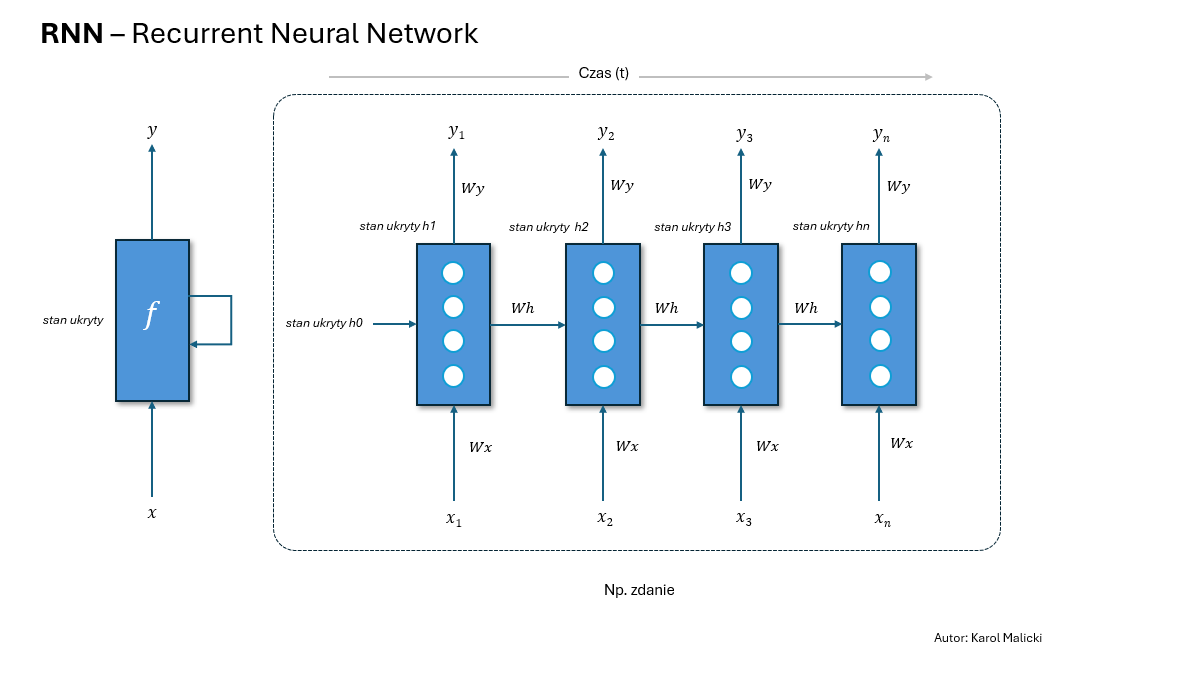

Import bibliotek

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, TimeDistributed
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

1. Przygotowanie danych treningowych:


In [3]:
input_texts = ['Dzień dobry', 'Jak się masz?', 'Mam na imię Karol.', 'Lubię programowanie.', 'Jak się nazywasz?', 'Witaj świecie']
output_texts = ['Good morning', 'How are you?', 'My name is Karol.', 'I like programming.', 'What is your name?', 'Hello World']

2. Tworzenie tokenizatorów:


Tworzenie tokenizatorów -> jeden do tekstów wejściowych, a drugi do tekstów wyjściowych. Tokenizatory zamieniają teksty na liczby (indeksy słów) dla późniejszego przetwarzania przez model.

In [4]:
input_tokenizer = Tokenizer(char_level=False)
output_tokenizer = Tokenizer(char_level=False)

3. Tokenizacja tekstów:


Zamiana słów na odpowiadające im indeksy tokenizatora

In [7]:
input_tokenizer.fit_on_texts(input_texts)
output_tokenizer.fit_on_texts(output_texts)

4. Zamiana tekstów na sekwencje:


Tworzenie sekwencji liczb reperezntujące słowa w tekstach wejściowych oraz wyjściowych

In [8]:
input_sequences = input_tokenizer.texts_to_sequences(input_texts)
output_sequences = output_tokenizer.texts_to_sequences(output_texts)

In [ ]:
print(input_sequences)
print("")
print(output_sequences)

[[ 3  4  0  0]
 [ 1  2  5  0]
 [ 6  7  8  9]
 [10 11  0  0]
 [ 1  2 12  0]]

[[ 3  4  0  0]
 [ 5  6  7  0]
 [ 8  1  2  9]
 [10 11 12  0]
 [13  2 14  1]]


5. Padding -> wyrównanie długości sekwencji:


Zasotosowanie paddingu do ujednolicenia długości sekwencji

In [9]:
max_input_length = max(len(seq) for seq in input_sequences)
max_output_length = max(len(seq) for seq in output_sequences)

input_sequences = pad_sequences(input_sequences, maxlen=max_input_length, padding='post')
output_sequences = pad_sequences(output_sequences, maxlen=max_output_length, padding='post')

6. Przygotowanie danych do treningu:


In [10]:
X = np.array(input_sequences)
y = np.array(output_sequences)

7. Definicja parametrów modelu:


Parametry modelu: rozmiar słownika wejściowego, wyjściowego, rozmiar wektora osadzenia (embedding) oraz liczba jednostek w warstwie RNN.

In [12]:
input_vocab_size = len(input_tokenizer.word_index) + 1  # dodajemy 1 na rzecz indeksu 0
output_vocab_size = len(output_tokenizer.word_index) + 1
embedding_dim = 50
hidden_units = 128

8. Tworzenie modelu:


Budowanie prostego modelu sieci RNN

In [13]:
model = Sequential()
model.add(Embedding(input_vocab_size, embedding_dim, input_length=max_input_length))
model.add(SimpleRNN(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(output_vocab_size, activation='softmax')))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


9. Kompilacja i trenowanie modelu:


In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, batch_size=1, epochs=100, verbose=False)

10. Funkcja do tłumaczenia:


In [16]:
def translate(input_text):
    # Tokenizacja tekstu wejściowego
    seq = input_tokenizer.texts_to_sequences([input_text])
    padded = pad_sequences(seq, maxlen=max_input_length, padding='post')

    # Przewidywanie
    pred = model.predict(padded)

    # Przekształcanie wyników na tekst
    predicted_sequence = np.argmax(pred, axis=-1)[0]
    translated_text = ' '.join([output_tokenizer.index_word.get(i, '') for i in predicted_sequence if i != 0])
    return translated_text


In [17]:
input_text = "Dzień dobry"
output_text = translate(input_text)
print(f"Tłumaczenie '{input_text}': {output_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Tłumaczenie 'Dzień dobry': good morning
